In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score,make_scorer

In [ ]:
# Load the dataset
df=pd.read_csv(r'/content/Electric_Vehicle_Population_Data.csv')

In [ ]:
df_30000 = df.head(30000)

In [ ]:
print(df_30000.head())

   VIN (1-10)    County        City State  Postal Code  Model Year       Make  \
0  1C4JJXP68P    Yakima      Yakima    WA      98901.0        2023       JEEP   
1  1G1FY6S03L    Kitsap    Kingston    WA      98346.0        2020  CHEVROLET   
2  KNDCE3LG9K      King     Seattle    WA      98125.0        2019        KIA   
3  1N4AZ0CP8E  Thurston     Olympia    WA      98506.0        2014     NISSAN   
4  5YJXCAE29L    Kitsap  Silverdale    WA      98383.0        2020      TESLA   

      Model                   Electric Vehicle Type  \
0  WRANGLER  Plug-in Hybrid Electric Vehicle (PHEV)   
1   BOLT EV          Battery Electric Vehicle (BEV)   
2      NIRO          Battery Electric Vehicle (BEV)   
3      LEAF          Battery Electric Vehicle (BEV)   
4   MODEL X          Battery Electric Vehicle (BEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0             Not eligible due to low battery range            21.0   
1           Clean Alternative Fuel Vehic

In [ ]:
df_30000.shape

(30000, 17)

In [ ]:
df_30000.describe

<bound method NDFrame.describe of        VIN (1-10)    County              City State  Postal Code  Model Year  \
0      1C4JJXP68P    Yakima            Yakima    WA      98901.0        2023   
1      1G1FY6S03L    Kitsap          Kingston    WA      98346.0        2020   
2      KNDCE3LG9K      King           Seattle    WA      98125.0        2019   
3      1N4AZ0CP8E  Thurston           Olympia    WA      98506.0        2014   
4      5YJXCAE29L    Kitsap        Silverdale    WA      98383.0        2020   
...           ...       ...               ...   ...          ...         ...   
29995  7SAYGDEE9N      King         Shoreline    WA      98177.0        2022   
29996  7SAYGDEE5N      King          Bellevue    WA      98005.0        2022   
29997  YV4EK3ZL9S      King  Lake Forest Park    WA      98155.0        2025   
29998  5UXTA6C02M      King          Kirkland    WA      98034.0        2021   
29999  1N4AZ0CP1D     Clark         Vancouver    WA      98682.0        2013   

            Make     Model                   Electric Vehicle Type  \
0           JEEP  WRANGLER  Plug-in Hybrid Electric Vehicle (PHEV)   
1      CHEVROLET   BOLT EV          Battery Electric Vehicle (BEV)   
2            KIA      NIRO          Battery Electric Vehicle (BEV)   
3         NISSAN      LEAF          Battery Electric Vehicle (BEV)   
4          TESLA   MODEL X          Battery Electric Vehicle (BEV)   
...          ...       ...                                     ...   
29995      TESLA   MODEL Y          Battery Electric Vehicle (BEV)   
29996      TESLA   MODEL Y          Battery Electric Vehicle (BEV)   
29997      VOLVO      EX30          Battery Electric Vehicle (BEV)   
29998        BMW        X5  Plug-in Hybrid Electric Vehicle (PHEV)   
29999     NISSAN      LEAF          Battery Electric Vehicle (BEV)   

       Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0                  Not eligible due to low battery range            21.0   
1                Clean Alternative Fuel Vehicle Eligible           259.0   
2                Clean Alternative Fuel Vehicle Eligible           239.0   
3                Clean Alternative Fuel Vehicle Eligible            84.0   
4                Clean Alternative Fuel Vehicle Eligible           293.0   
...                                                  ...             ...   
29995  Eligibility unknown as battery range has not b...             0.0   
29996  Eligibility unknown as battery range has not b...             0.0   
29997  Eligibility unknown as battery range has not b...             0.0   
29998            Clean Alternative Fuel Vehicle Eligible            30.0   
29999            Clean Alternative Fuel Vehicle Eligible            75.0   

       Base MSRP  Legislative District  DOL Vehicle ID  \
0            0.0                  15.0       249905295   
1            0.0                  23.0       141133765   
2            0.0                  46.0         3410074   
3            0.0                  22.0       182436474   
4            0.0                  23.0         1843054   
...          ...                   ...             ...   
29995        0.0                  32.0       190100557   
29996        0.0                  41.0       183404777   
29997        0.0                  46.0       278132172   
29998        0.0                  45.0       276854560   
29999        0.0                  17.0       190511499   

                  Vehicle Location  \
0      POINT (-120.50729 46.60464)   
1       POINT (-122.4977 47.79802)   
2      POINT (-122.30253 47.72656)   
3      POINT (-122.87741 47.05997)   
4      POINT (-122.69275 47.65171)   
...                            ...   
29995  POINT (-122.36498 47.72238)   
29996   POINT (-122.1621 47.64441)   
29997   POINT (-122.3175 47.75781)   
29998  POINT (-122.22901 47.72201)   
29999  POINT (-122.55149 45.69345)   

                                        Electric Utility  2020 Census Tract  
0                  

In [ ]:
df_30000.skew

<bound method DataFrame.skew of        VIN (1-10)    County              City State  Postal Code  Model Year  \
0      1C4JJXP68P    Yakima            Yakima    WA      98901.0        2023   
1      1G1FY6S03L    Kitsap          Kingston    WA      98346.0        2020   
2      KNDCE3LG9K      King           Seattle    WA      98125.0        2019   
3      1N4AZ0CP8E  Thurston           Olympia    WA      98506.0        2014   
4      5YJXCAE29L    Kitsap        Silverdale    WA      98383.0        2020   
...           ...       ...               ...   ...          ...         ...   
29995  7SAYGDEE9N      King         Shoreline    WA      98177.0        2022   
29996  7SAYGDEE5N      King          Bellevue    WA      98005.0        2022   
29997  YV4EK3ZL9S      King  Lake Forest Park    WA      98155.0        2025   
29998  5UXTA6C02M      King          Kirkland    WA      98034.0        2021   
29999  1N4AZ0CP1D     Clark         Vancouver    WA      98682.0        2013   

            Make     Model                   Electric Vehicle Type  \
0           JEEP  WRANGLER  Plug-in Hybrid Electric Vehicle (PHEV)   
1      CHEVROLET   BOLT EV          Battery Electric Vehicle (BEV)   
2            KIA      NIRO          Battery Electric Vehicle (BEV)   
3         NISSAN      LEAF          Battery Electric Vehicle (BEV)   
4          TESLA   MODEL X          Battery Electric Vehicle (BEV)   
...          ...       ...                                     ...   
29995      TESLA   MODEL Y          Battery Electric Vehicle (BEV)   
29996      TESLA   MODEL Y          Battery Electric Vehicle (BEV)   
29997      VOLVO      EX30          Battery Electric Vehicle (BEV)   
29998        BMW        X5  Plug-in Hybrid Electric Vehicle (PHEV)   
29999     NISSAN      LEAF          Battery Electric Vehicle (BEV)   

       Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0                  Not eligible due to low battery range            21.0   
1                Clean Alternative Fuel Vehicle Eligible           259.0   
2                Clean Alternative Fuel Vehicle Eligible           239.0   
3                Clean Alternative Fuel Vehicle Eligible            84.0   
4                Clean Alternative Fuel Vehicle Eligible           293.0   
...                                                  ...             ...   
29995  Eligibility unknown as battery range has not b...             0.0   
29996  Eligibility unknown as battery range has not b...             0.0   
29997  Eligibility unknown as battery range has not b...             0.0   
29998            Clean Alternative Fuel Vehicle Eligible            30.0   
29999            Clean Alternative Fuel Vehicle Eligible            75.0   

       Base MSRP  Legislative District  DOL Vehicle ID  \
0            0.0                  15.0       249905295   
1            0.0                  23.0       141133765   
2            0.0                  46.0         3410074   
3            0.0                  22.0       182436474   
4            0.0                  23.0         1843054   
...          ...                   ...             ...   
29995        0.0                  32.0       190100557   
29996        0.0                  41.0       183404777   
29997        0.0                  46.0       278132172   
29998        0.0                  45.0       276854560   
29999        0.0                  17.0       190511499   

                  Vehicle Location  \
0      POINT (-120.50729 46.60464)   
1       POINT (-122.4977 47.79802)   
2      POINT (-122.30253 47.72656)   
3      POINT (-122.87741 47.05997)   
4      POINT (-122.69275 47.65171)   
...                            ...   
29995  POINT (-122.36498 47.72238)   
29996   POINT (-122.1621 47.64441)   
29997   POINT (-122.3175 47.75781)   
29998  POINT (-122.22901 47.72201)   
29999  POINT (-122.55149 45.69345)   

                                        Electric Utility  2020 Census Tract  
0                    

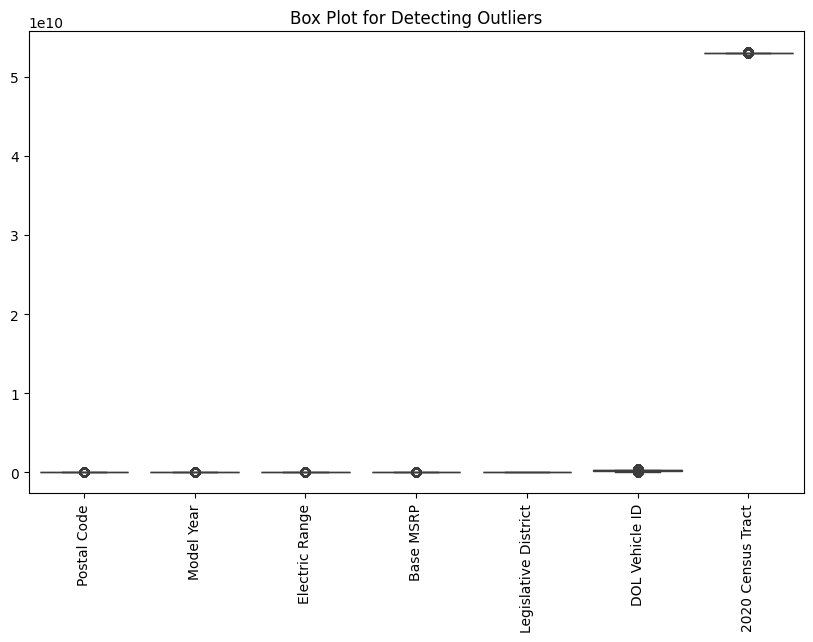

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_30000)
plt.title('Box Plot for Detecting Outliers')
plt.xticks(rotation=90)
plt.show()

In [ ]:
numeric= df_30000.select_dtypes(include=['number'])

Q1 = numeric.quantile(0.25)
Q3 = numeric.quantile(0.75)
IQR = Q3 - Q1

outliers = df_30000[(numeric < (Q1 - 1.5 * IQR)) | (numeric > (Q3 + 1.5 * IQR))]

cleaned_numeric_data = numeric[(numeric >= (Q1 - 1.5 * IQR)) & (numeric <= (Q3 + 1.5 * IQR))]

print('Cleaned Data:')
print(cleaned_numeric_data)

Cleaned Data:
       Postal Code  Model Year  Electric Range  Base MSRP  \
0              NaN      2023.0            21.0        0.0   
1          98346.0      2020.0             NaN        0.0   
2          98125.0      2019.0             NaN        0.0   
3              NaN      2014.0            84.0        0.0   
4          98383.0      2020.0             NaN        0.0   
...            ...         ...             ...        ...   
29995      98177.0      2022.0             0.0        0.0   
29996      98005.0      2022.0             0.0        0.0   
29997      98155.0      2025.0             0.0        0.0   
29998      98034.0      2021.0            30.0        0.0   
29999          NaN         NaN            75.0        0.0   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
0                      15.0     249905295.0                NaN  
1                      23.0     141133765.0                NaN  
2                      46.0             NaN       5.303300

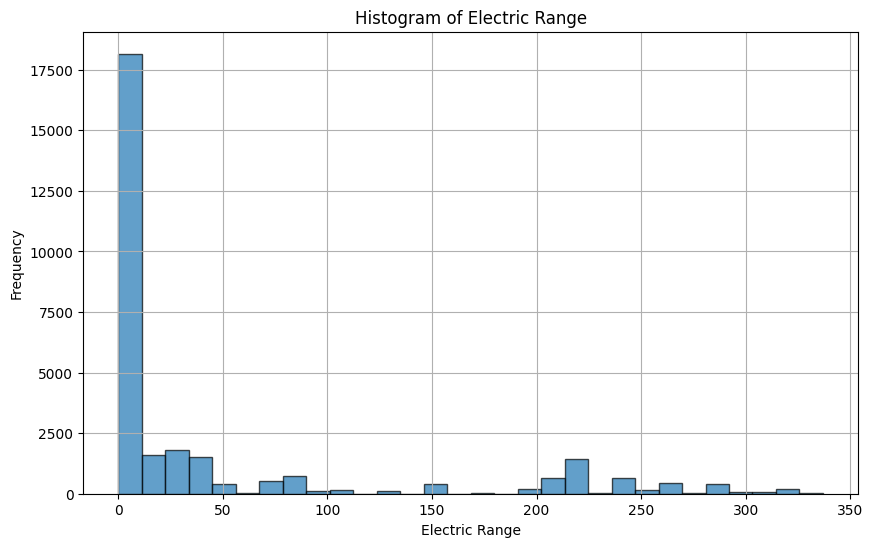

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_30000['Electric Range'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Electric Range')
plt.xlabel('Electric Range')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
df_30000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN (1-10)                                         30000 non-null  object 
 1   County                                             29998 non-null  object 
 2   City                                               29998 non-null  object 
 3   State                                              30000 non-null  object 
 4   Postal Code                                        29998 non-null  float64
 5   Model Year                                         30000 non-null  int64  
 6   Make                                               30000 non-null  object 
 7   Model                                              30000 non-null  object 
 8   Electric Vehicle Type                              30000 non-null  object 
 9   Clean 

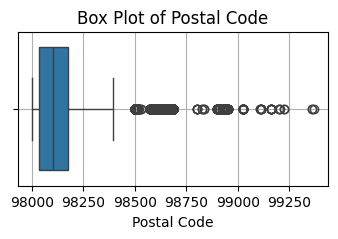

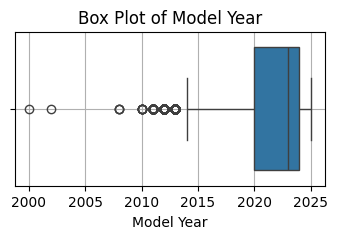

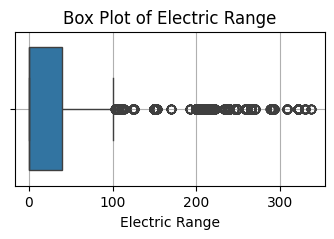

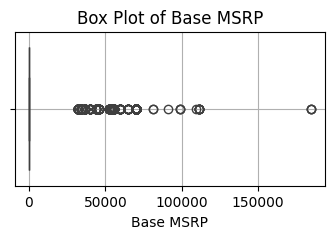

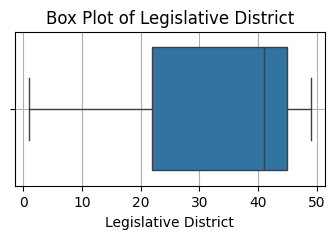

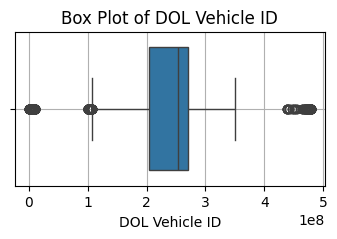

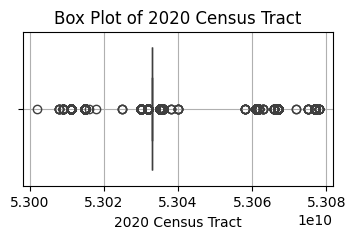

In [ ]:
numeric_cols = df_30000.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    plt.figure(figsize=(4, 2))
    sns.boxplot(x=df_30000[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.show()

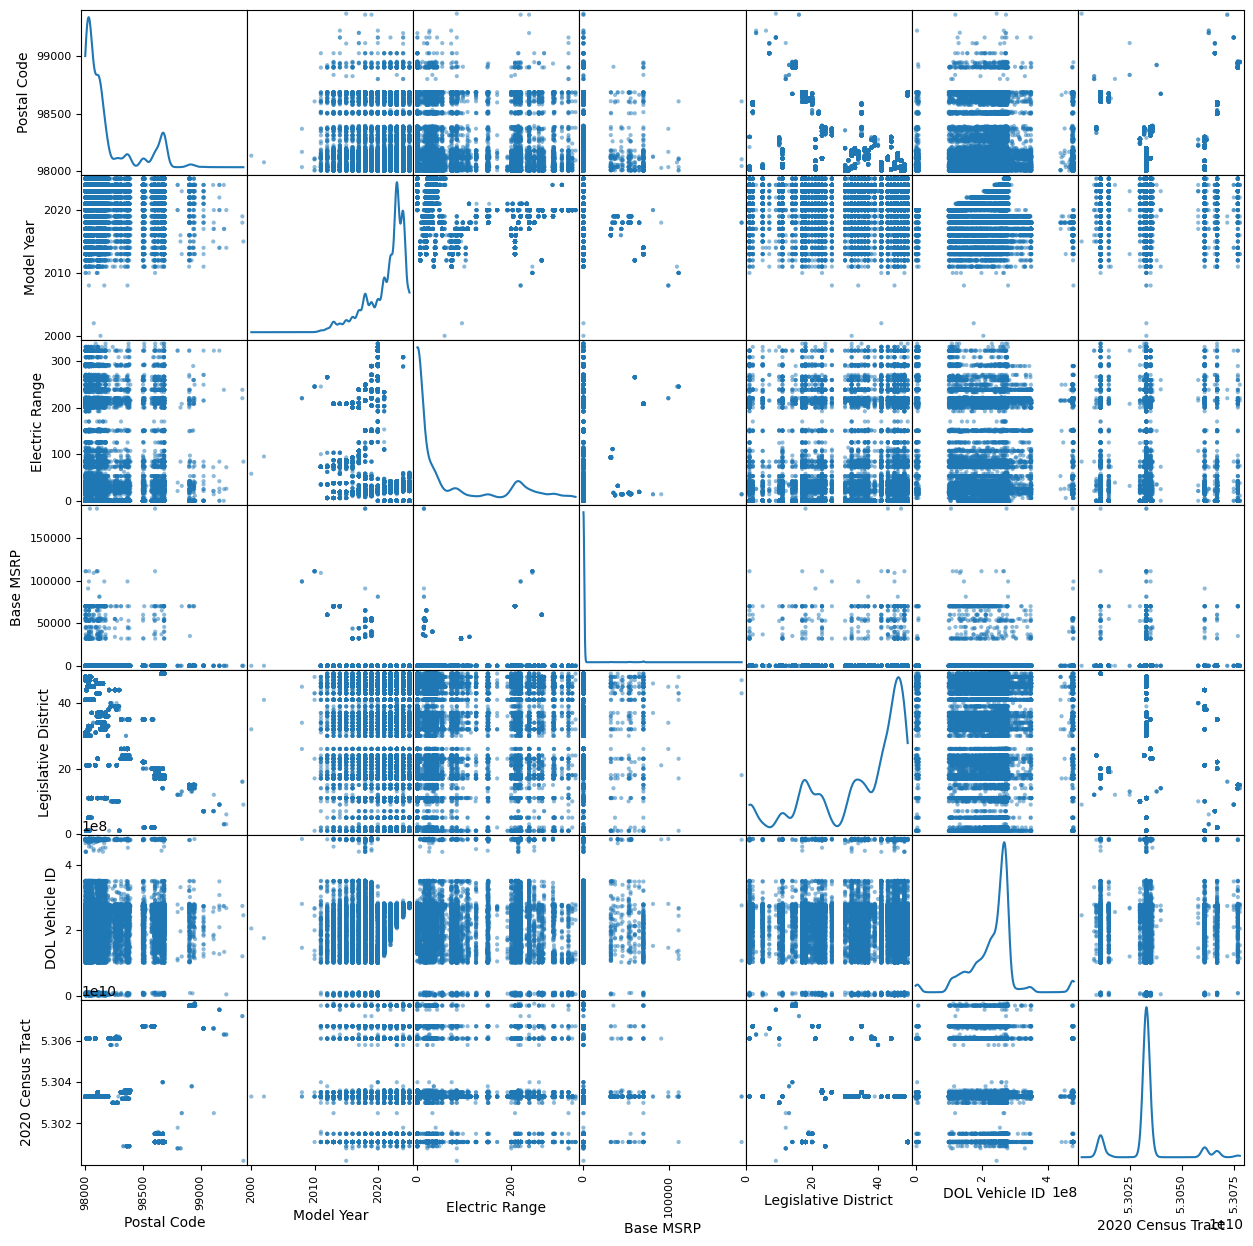

In [ ]:
pd.plotting.scatter_matrix(df_30000[numeric_cols], figsize=(15,15), diagonal='kde')
plt.show()

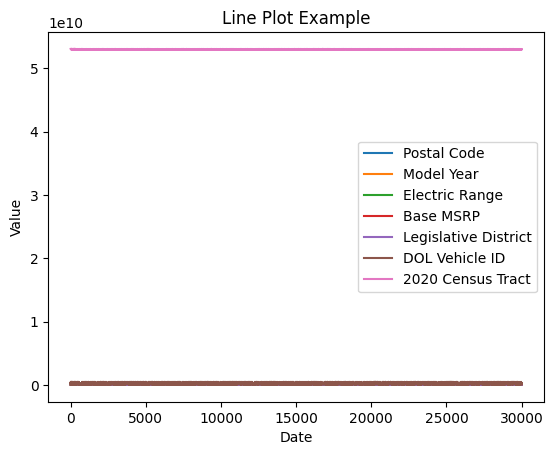

In [ ]:
df_30000.plot(kind='line')
plt.title('Line Plot Example')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [ ]:
df_30000.dropna(inplace=True)

<ipython-input-15-b3c69ddc6441>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_30000.dropna(inplace=True)


In [ ]:
df_30000.drop(columns='VIN (1-10)')

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,Yakima,Yakima,WA,98901.0,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,15.0,249905295,POINT (-120.50729 46.60464),PACIFICORP,5.307700e+10
1,Kitsap,Kingston,WA,98346.0,2020,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,259.0,0.0,23.0,141133765,POINT (-122.4977 47.79802),PUGET SOUND ENERGY INC,5.303594e+10
2,King,Seattle,WA,98125.0,2019,KIA,NIRO,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,239.0,0.0,46.0,3410074,POINT (-122.30253 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,Thurston,Olympia,WA,98506.0,2014,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,22.0,182436474,POINT (-122.87741 47.05997),PUGET SOUND ENERGY INC,5.306701e+10
4,Kitsap,Silverdale,WA,98383.0,2020,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,293.0,0.0,23.0,1843054,POINT (-122.69275 47.65171),PUGET SOUND ENERGY INC,5.303509e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,King,Shoreline,WA,98177.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,32.0,190100557,POINT (-122.36498 47.72238),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303302e+10
29996,King,Bellevue,WA,98005.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,41.0,183404777,POINT (-122.1621 47.64441),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
29997,King,Lake Forest Park,WA,98155.0,2025,VOLVO,EX30,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,46.0,278132172,POINT (-122.3175 47.75781),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303302e+10
29998,King,Kirkland,WA,98034.0,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,45.0,276854560,POINT (-122.22901 47.72201),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10


In [ ]:
df_30000 = pd.get_dummies(df_30000, columns=['Make', 'Model', 'Electric Vehicle Type','County','City','Electric Utility','Electric Vehicle Type','Clean Alternative Fuel Vehicle (CAFV) Eligibility'])

In [ ]:
X = df_30000.drop(['Electric Range','VIN (1-10)','State','Postal Code','Vehicle Location','DOL Vehicle ID','2020 Census Tract'], axis=1)
y = df_30000['Electric Range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
models = {"Linear Regression": LinearRegression(),
           "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
           "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
           "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=100, random_state=42),
           "Support Vector Regressor": SVR()
         }

In [ ]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'MSE': mse, 'MAE': mae, 'R2': r2}

In [ ]:
print("Model Evaluation Results:")
for name, metrics in results.items():
    print(f"{name}:")
    print(f"MSE: {metrics['MSE']:.2f}")
    print(f"MAE: {metrics['MAE']:.2f}")
    print(f"R2: {metrics['R2']:.2f}")
    print()

Model Evaluation Results:
Linear Regression:
MSE: 366.78
MAE: 11.39
R2: 0.95

Decision Tree Regressor:
MSE: 17.89
MAE: 0.52
R2: 1.00

Random Forest Regressor:
MSE: 16.38
MAE: 0.56
R2: 1.00

Gradient Boosting Regressor:
MSE: 45.93
MAE: 2.89
R2: 0.99

Support Vector Regressor:
MSE: 9139.55
MAE: 46.18
R2: -0.28



In [ ]:
best_model = max(results, key=lambda x: results[x]['R2'])

print(f"Best-Performing Model: {best_model}")
print(f"  MSE: {results[best_model]['MSE']:.2f}")
print(f"  MAE: {results[best_model]['MAE']:.2f}")
print(f"  R2: {results[best_model]['R2']:.2f}")
print()

Best-Performing Model: Random Forest Regressor
  MSE: 16.38
  MAE: 0.56
  R2: 1.00



#Hyperparameter Tuning of the best performing model

In [ ]:
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
best_trained_model = models["Random Forest Regressor"]
scorer = make_scorer(mean_squared_error, greater_is_better=False)

grid_search = GridSearchCV(estimator=best_trained_model, param_grid=param_grid, cv=5, scoring=scorer)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [ ]:
print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best Score: -17.23806594921435


#Model Saving

In [ ]:
import joblib

joblib.dump(grid_search.best_estimator_, 'model_pipeline.pkl')

['model_pipeline.pkl']

#Tuned Model Evaluation

In [ ]:
loaded_model = joblib.load('model_pipeline.pkl')
predictions = loaded_model.predict(X_test)

MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)
R2 = r2_score(y_test, predictions)

In [ ]:
print(f"Mean Squared Error: {MSE}")
print(f"Mean Absolute Error: {MAE}")
print(f"R2 : {R2}")

Mean Squared Error: 15.711684293166531
Mean Absolute Error: 0.5761883179940215
R2 : 0.9978057718246418
